## Import Relevent Packages for our Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Read in our files using pandas

In [2]:
df1 = pd.read_csv('Data/Washington.csv', low_memory=False)
df2 = pd.read_csv('Data/Multnomah.csv', low_memory=False)
df3 = pd.read_csv('Data/Clackamas.csv', low_memory=False)
df4 = pd.read_csv('Data/Marion.csv', low_memory=False)
codes = pd.read_csv('Data/CDS Code Translate.csv',encoding='cp1252')

## After looking through the county files we will seperate them into two DF one with the crash data and another with the driver data 
### (we will practice merging them later)

In [3]:
washington = df1[['Crash ID', 'Crash Month', 'Crash Day', 'Crash Year']].copy()
multnomah = df2[['Crash ID', 'Crash Month', 'Crash Day', 'Crash Year']].copy()
clackamas = df3[['Crash ID', 'Crash Month', 'Crash Day', 'Crash Year']].copy()
marion = df4[['Crash ID', 'Crash Month', 'Crash Day', 'Crash Year']].copy()

<font>We will need to create the driver __DF__ with only  the records of accident participents *record type* 3 and the drivers *Participant code* 1 </font>

In [4]:
washington_drivers = df1[['Crash ID', 'Driver Residence', 'Driver License Status', 'Participant Type Code', 'Record Type']].loc[df1['Record Type'] == 3].loc[df1['Participant Type Code'] == 1].copy()
multnomah_drivers = df2[['Crash ID', 'Driver Residence', 'Driver License Status', 'Participant Type Code', 'Record Type']].loc[df2['Record Type'] == 3].loc[df2['Participant Type Code'] == 1].copy()
clackamas_drivers = df3[['Crash ID', 'Driver Residence', 'Driver License Status', 'Participant Type Code', 'Record Type']].loc[df3['Record Type'] == 3].loc[df3['Participant Type Code'] == 1].copy()
marion_drivers = df4[['Crash ID', 'Driver Residence', 'Driver License Status', 'Participant Type Code', 'Record Type']].loc[df4['Record Type'] == 3].loc[df4['Participant Type Code'] == 1].copy()

<font>Getting ride of the rows that are full of NaN will leave us with only the rows with the date and crash id</font>

In [5]:
washington = washington.dropna()
multnomah = multnomah.dropna()
clackamas = clackamas.dropna()
marion = marion.dropna()

In [6]:
print(washington.head())
print(multnomah.head())
print(clackamas.head())
print(marion.head())

    Crash ID  Crash Month  Crash Day  Crash Year
0    1450022          1.0        1.0      2012.0
3    1450709          1.0        9.0      2012.0
8    1451163          1.0       13.0      2012.0
12   1451403          1.0       15.0      2012.0
18   1451432          1.0       15.0      2012.0
    Crash ID  Crash Month  Crash Day  Crash Year
0    1449628          1.0        5.0      2012.0
5    1449632          1.0        5.0      2012.0
9    1449640          1.0        5.0      2012.0
14   1449642          1.0        5.0      2012.0
20   1449649          1.0        5.0      2012.0
    Crash ID  Crash Month  Crash Day  Crash Year
0    1449644          1.0        1.0      2012.0
6    1449647          1.0        2.0      2012.0
11   1449654          1.0        2.0      2012.0
15   1449660          1.0        2.0      2012.0
20   1449670          1.0        3.0      2012.0
    Crash ID  Crash Month  Crash Day  Crash Year
0    1500448          1.0        3.0      2013.0
5    1500457        

<font>Lets check to see if there is any duplication with the the crash ID's</font>

In [7]:
print(washington['Crash ID'].nunique())
print(multnomah['Crash ID'].nunique())
print(clackamas['Crash ID'].nunique())
print(marion['Crash ID'].nunique())

28296
54208
18615
17218


In [8]:
print(washington.shape)
print(multnomah.shape)
print(clackamas.shape)
print(marion.shape)

(28296, 4)
(54208, 4)
(18615, 4)
(17218, 4)


<font>Lets turn the year, month, and day columns into a single datetime object column</font>

In [9]:
washington = washington.rename(columns={'Crash Year': 'year', 'Crash Month': 'month', 'Crash Day': 'day'})
multnomah = multnomah.rename(columns={'Crash Year': 'year', 'Crash Month': 'month', 'Crash Day': 'day'})
clackamas = clackamas.rename(columns={'Crash Year': 'year', 'Crash Month': 'month', 'Crash Day': 'day'})
marion = marion.rename(columns={'Crash Year': 'year', 'Crash Month': 'month', 'Crash Day': 'day'})
washington['date'] = pd.to_datetime(washington[['year', 'month', 'day']])
multnomah['date'] = pd.to_datetime(multnomah[['year', 'month', 'day']])
clackamas['date'] = pd.to_datetime(clackamas[['year', 'month', 'day']])
marion['date'] = pd.to_datetime(marion[['year', 'month', 'day']])
washington.drop(columns=['year', 'month', 'day'], inplace=True)
multnomah.drop(columns=['year', 'month', 'day'], inplace=True)
clackamas.drop(columns=['year', 'month', 'day'], inplace=True)
marion.drop(columns=['year', 'month', 'day'], inplace=True)

### Lets to a merge from the driver DF to the accident DF leaving us with a DF with the date of the crash, the crash ID and some info on the driver!

In [10]:
joined_washington = pd.merge(washington_drivers, washington, on='Crash ID', how='left')
joined_multnomah = pd.merge(multnomah_drivers, multnomah, on='Crash ID', how='left')
joined_clackamas = pd.merge(clackamas_drivers, clackamas, on='Crash ID', how='left')
joined_marion = pd.merge(marion_drivers, marion, on='Crash ID', how='left')

## Lets rename some of the columns to make it easier to navigate the DF

In [11]:
joined_washington = joined_washington.rename(columns={'Crash ID': 'ID', 'Driver Residence': 'residence', 'Driver License Status': 'driver_status', 'Participant Type Code': 'participant_code', 'Record Type': 'record_type'})
joined_multnomah = joined_multnomah.rename(columns={'Crash ID': 'ID', 'Driver Residence': 'residence', 'Driver License Status': 'driver_status', 'Participant Type Code': 'participant_code', 'Record Type': 'record_type'})
joined_clackamas = joined_clackamas.rename(columns={'Crash ID': 'ID', 'Driver Residence': 'residence', 'Driver License Status': 'driver_status', 'Participant Type Code': 'participant_code', 'Record Type': 'record_type'})
joined_marion = joined_marion.rename(columns={'Crash ID': 'ID', 'Driver Residence': 'residence', 'Driver License Status': 'driver_status', 'Participant Type Code': 'participant_code', 'Record Type': 'record_type'})

## Lets make a some graphs showing how the number of accidents change with the months

In [12]:
washington_monthly = joined_washington.groupby([joined_washington.date.dt.year, joined_washington.date.dt.month]).count()['ID']
multnomah_monthly = joined_multnomah.groupby([joined_multnomah.date.dt.year, joined_multnomah.date.dt.month]).count()['ID']
clackamas_monthly = joined_clackamas.groupby([joined_clackamas.date.dt.year, joined_clackamas.date.dt.month]).count()['ID']
marion_monthly = joined_marion.groupby([joined_marion.date.dt.year, joined_marion.date.dt.month]).count()['ID']

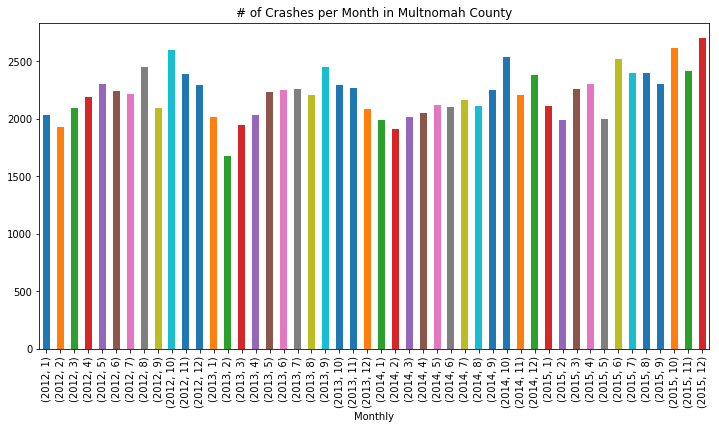

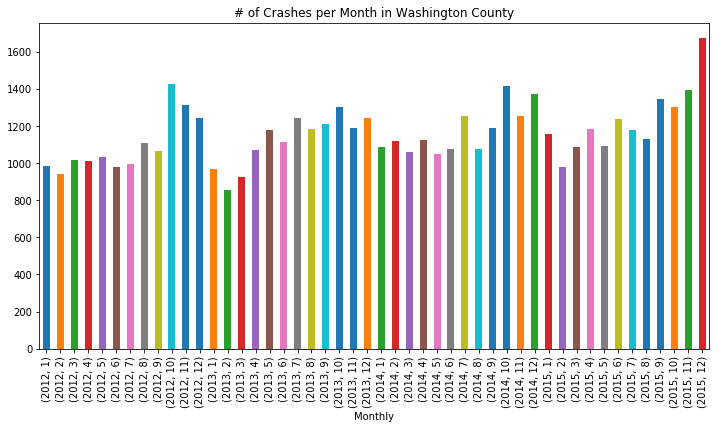

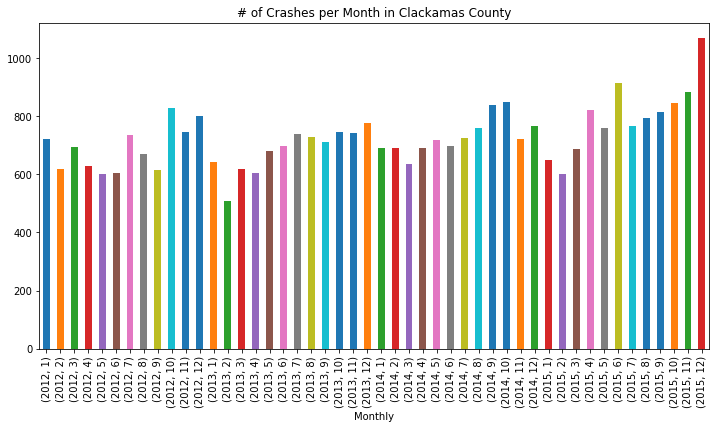

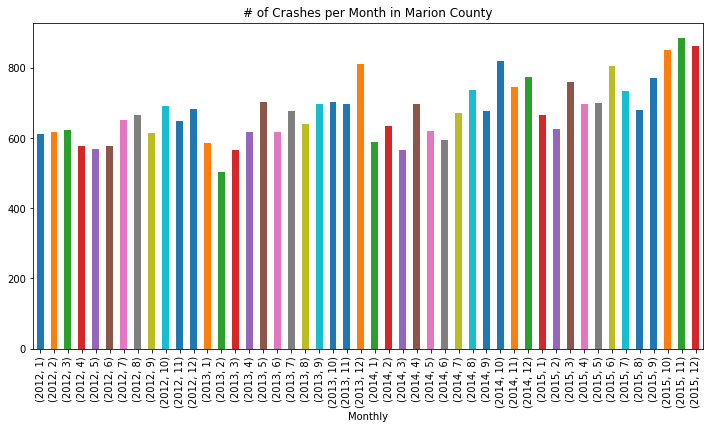

In [13]:
%matplotlib inline
multnomah_monthly.plot.bar(title='# of Crashes per Month in Multnomah County', figsize=(12,6))
plt.xlabel('Monthly')
plt.show()
washington_monthly.plot.bar(title="# of Crashes per Month in Washington County", figsize=(12,6))
plt.xlabel('Monthly')
plt.show()
clackamas_monthly.plot.bar(title="# of Crashes per Month in Clackamas County", figsize=(12,6))
plt.xlabel('Monthly')
plt.show()
marion_monthly.plot.bar(title="# of Crashes per Month in Marion County", figsize=(12,6))
plt.xlabel('Monthly')
plt.show()


## That looks pretty cool! lets graph the yearly crashes then look at the data and create a linear regression model to predict the number of crashes in 2016

In [14]:
print('marion')
print(joined_marion.groupby([joined_marion.date.dt.year]).count()['ID'])
print('washington')
print(joined_washington.groupby([joined_washington.date.dt.year]).count()['ID'])
print('clackamas')
print(joined_clackamas.groupby([joined_clackamas.date.dt.year]).count()['ID'])
print('multnomah')
print(joined_multnomah.groupby([joined_multnomah.date.dt.year]).count()['ID'])

marion
date
2012    7523
2013    7811
2014    8117
2015    9025
Name: ID, dtype: int64
washington
date
2012    13111
2013    13477
2014    14069
2015    14752
Name: ID, dtype: int64
clackamas
date
2012    8269
2013    8194
2014    8784
2015    9607
Name: ID, dtype: int64
multnomah
date
2012    26802
2013    25720
2014    25833
2015    27995
Name: ID, dtype: int64


In [15]:
washington_yearly = joined_washington.groupby([joined_washington.date.dt.year]).count()['ID']
multnomah_yearly = joined_multnomah.groupby([joined_multnomah.date.dt.year]).count()['ID']
clackamas_yearly = joined_clackamas.groupby([joined_clackamas.date.dt.year]).count()['ID']
marion_yearly = joined_marion.groupby([joined_marion.date.dt.year]).count()['ID']

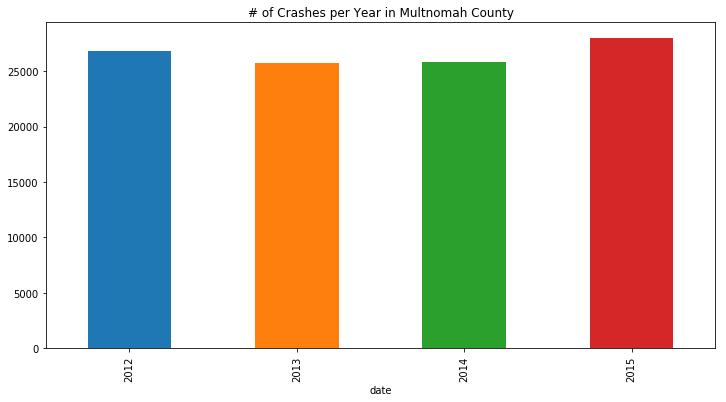

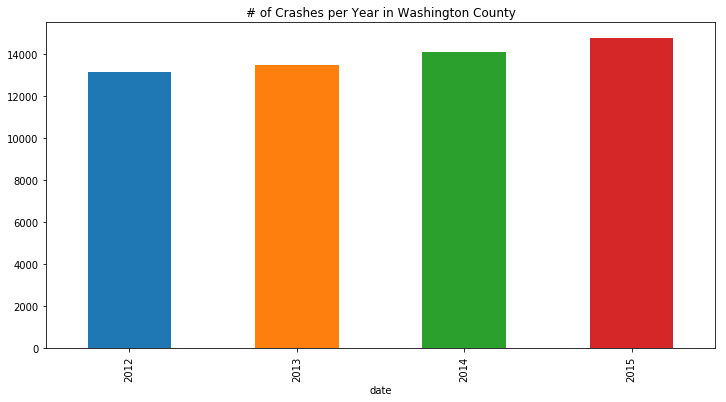

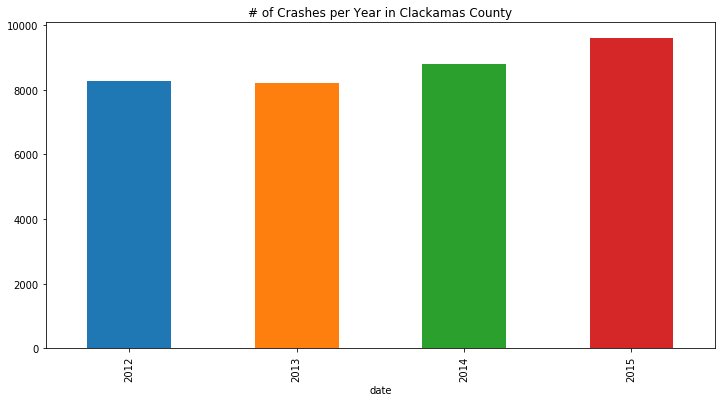

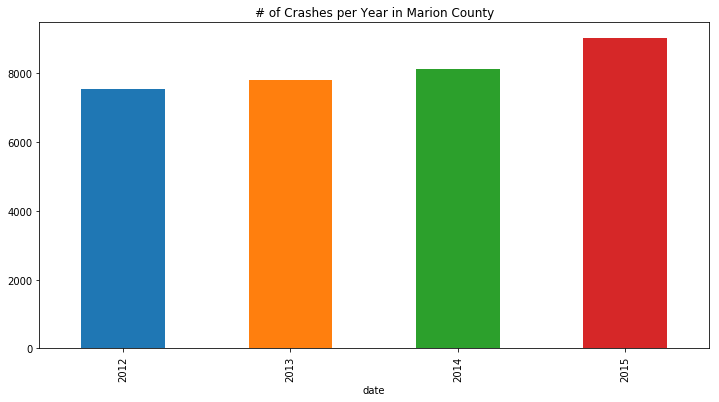

In [16]:
%matplotlib inline
multnomah_yearly.plot.bar(title='# of Crashes per Year in Multnomah County', figsize=(12,6))
plt.show()
washington_yearly.plot.bar(title="# of Crashes per Year in Washington County", figsize=(12,6))
plt.show()
clackamas_yearly.plot.bar(title="# of Crashes per Year in Clackamas County", figsize=(12,6))
plt.show()
marion_yearly.plot.bar(title="# of Crashes per Year in Marion County", figsize=(12,6))
plt.show()

<font>Using the Data above I created an Excel file to do the simple calculations</font>

In [21]:
linear_regression_marion = pd.read_csv('Data/linear_regression_marion.csv')
linear_regression_clackamas = pd.read_csv('Data/linear_regression_clackamas.csv')
linear_regression_washington = pd.read_csv('Data/linear_regression_washington.csv')
linear_regression_multnomah = pd.read_csv('Data/linear_regression_multnomah.csv')

In [22]:
display(linear_regression_marion)
display(linear_regression_clackamas)
display(linear_regression_washington)
display(linear_regression_multnomah)

Table 1
NaN     Year or X Crashes or Y Year - average or X - X̅ Crashes - average or Y - Y̅ (Year - average)2 or (X - X̅)2         (Year - average) * (crashes - average) or  (X ...
        2012      7523         -1.5                     -596                        2.25                                                                                 894
        2013      7811         -0.5                     -308                        0.25                                                                                 154
        2014      8117         0.5                      -2                          0.25                                                                                  -1
        2015      9025         1.5                      906                         2.25                                                                                1359
Average 2013.5    8119         NaN                      Sum                         5                                                                                   2406
NaN     NaN       NaN          NaN                      B1                          B1 = (∑(x - x̅)(y - y̅))/(∑(x - x̅)2)                                              481.2
                                                        B0                          Y̅ = B0 + B1 * X̅                                                              -960777.2
                                                        NaN                         Prediction for 2016                                                                 9322

Table 1
NaN     Year or X Crashes or Y Year - average or X - X̅ Crashes - average or Y - Y̅ (Year - average)2 or (X - X̅)2         (Year - average) * (crashes - average) or  (X ...
        2012      8269         -1.5                     -444.5                      2.25                                                                              666.75
        2013      8194         -0.5                     -519.5                      0.25                                                                              259.75
        2014      8784         0.5                      70.5                        0.25                                                                               35.25
        2015      9607         1.5                      893.5                       2.25                                                                             1340.25
Average 2013.5    8713.5       NaN                      Sum                         5                                                                                   2302
NaN     NaN       NaN          NaN                      B1                          B1 = (∑(x - x̅)(y - y̅))/(∑(x - x̅)2)                                              460.4
                                                        B0                          Y̅ = B0 + B1 * X̅                                                              -918301.9
                                                        NaN                         Prediction for 2016                                                               9864.5

Table 1
NaN     Year or X Crashes or Y Year - average or X - X̅ Crashes - average or Y - Y̅ (Year - average)2 or (X - X̅)2         (Year - average) * (crashes - average) or  (X ...
        2012      13111        -1.5                     -741.25                     2.25                                                                            1111.875
        2013      13477        -0.5                     -375.25                     0.25                                                                             187.625
        2014      14069        0.5                      216.75                      0.25                                                                             108.375
        2015      14752        1.5                      899.75                      2.25                                                                            1349.625
Average 2013.5    13852.25     NaN                      Sum                         5                                                                                 2757.5
NaN     NaN       NaN          NaN                      B1                          B1 = (∑(x - x̅)(y - y̅))/(∑(x - x̅)2)                                              551.5
                                                        B0                          Y̅ = B0 + B1 * X̅                                                               -1096593
                                                        NaN                         Prediction for 2016                                                                15231

Table 1
NaN     Year or X Crashes or Y Year - average or X - X̅ Crashes - average or Y - Y̅ (Year - average)2 or (X - X̅)2         (Year - average) * (crashes - average) or  (X ...
        2012      26802        -1.5                     214.5                       2.25                                                                             -321.75
        2013      25720        -0.5                     -867.5                      0.25                                                                              433.75
        2014      25833        0.5                      -754.5                      0.25                                                                             -377.25
        2015      27995        1.5                      1407.5                      2.25                                                                             2111.25
Average 2013.5    26587.5      NaN                      Sum                         5                                                                                   1846
NaN     NaN       NaN          NaN                      B1                          B1 = (∑(x - x̅)(y - y̅))/(∑(x - x̅)2)                                              369.2
                                                        B0                          Y̅ = B0 + B1 * X̅                                                              -716796.7
                                                        NaN                         Prediction for 2016                                                              27510.5

### Using linear regression
<font>
The estimated number of 2016 crashes in Marion County is __9322__<br>
The estimated number of 2016 crashes in Clackamas County is __9864.5__<br>
The estimated number of 2016 crashes in Washington County is __15231__<br>
The estimated number of 2016 crashes in Multnomah County is __27510.5__<br>
</font>